In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/calcofi/bottle.csv
/kaggle/input/calcofi/cast.csv


In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing,svm
from sklearn.model_selection import train_test_split
from sklearn .linear_model import LinearRegression



/tmp/ipykernel_33/1984219420.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/kaggle/input/calcofi/bottle.csv")


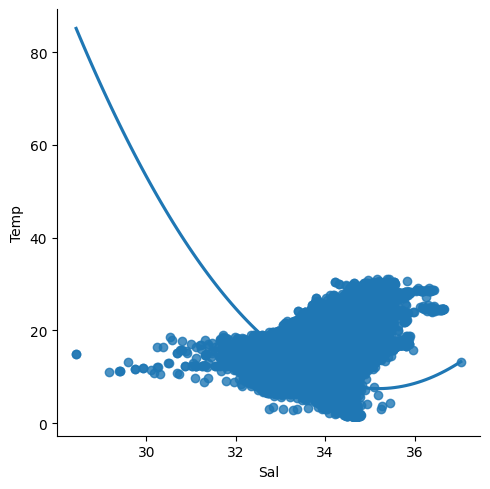

In [24]:
df=pd.read_csv("/kaggle/input/calcofi/bottle.csv")
df_bin=df[['Salnty','T_degC']]
df_bin.columns=['Sal','Temp']
df_bin.head()
sns.lmplot(x="Sal",y="Temp",data=df_bin,order=2,ci=None)


In [28]:
x=np.array(df_bin['Sal']).reshape(-1,1)
y=np.array(df_bin['Temp']).reshape(-1,1)
df_bin.dropna(inplace=True)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
model=LinearRegression()
model.fit(x_train,y_train)
print(model.score(x_train,y_train))


0.2553379476174539


/tmp/ipykernel_33/2780052006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin.dropna(inplace=True)


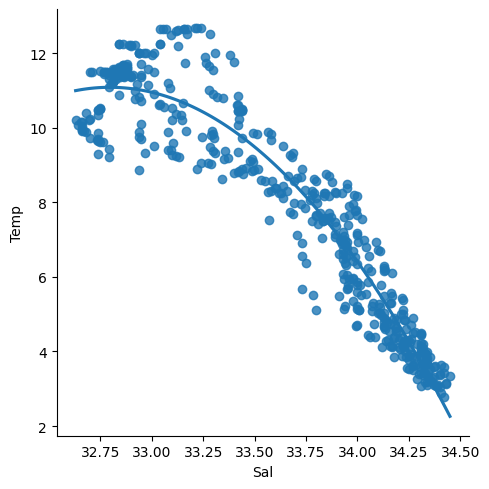

In [33]:
df_bin_500=df_bin[:][:500]#all columns with 0-500 rows
sns.lmplot(x="Sal",y="Temp",data=df_bin_500,order=2,ci=None)




In [30]:
x=np.array(df_bin_500['Sal']).reshape(-1,1)
y=np.array(df_bin_500['Temp']).reshape(-1,1)
df_bin_500.dropna(inplace=True)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
model=LinearRegression()
model.fit(x_train,y_train)
print(model.score(x_train,y_train))

0.8558898247539967


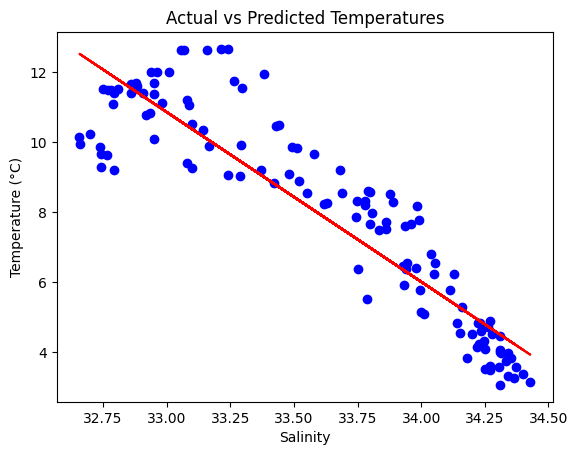

In [34]:
y_pred=model.predict(x_test)
plt.scatter(x_test,y_test,color='b')
plt.plot(x_test,y_pred,color='r')
plt.xlabel('Salinity')
plt.ylabel('Temperature (°C)')
plt.title('Actual vs Predicted Temperatures')
plt.show()